# TP : Graphe de Facebook

Dans ce TP, nous étudions des [graphes collectés par une équipe de recherche à Stanford](http://snap.stanford.edu/data/index.html) dans différents domaines : réseaux sociaux, réseaux routiers, graphe des avis de consommateurs...

Nous utiliserons les modules suivants :

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

## Graphe de Facebook

Chargeons un graphe `G` obtenu à partir d'utilisateurs de Facebook (les sommets du graphe), où les arêtes correspondent aux relations d'amitié :

In [2]:
df_fb = pd.read_csv('http://snap.stanford.edu/data/facebook_combined.txt.gz', compression='gzip', sep=' ', names=['start_node', 'end_node'])
G = nx.from_pandas_edgelist(df_fb, 'start_node', 'end_node')

### Affichage

Commencons par afficher le graphe :

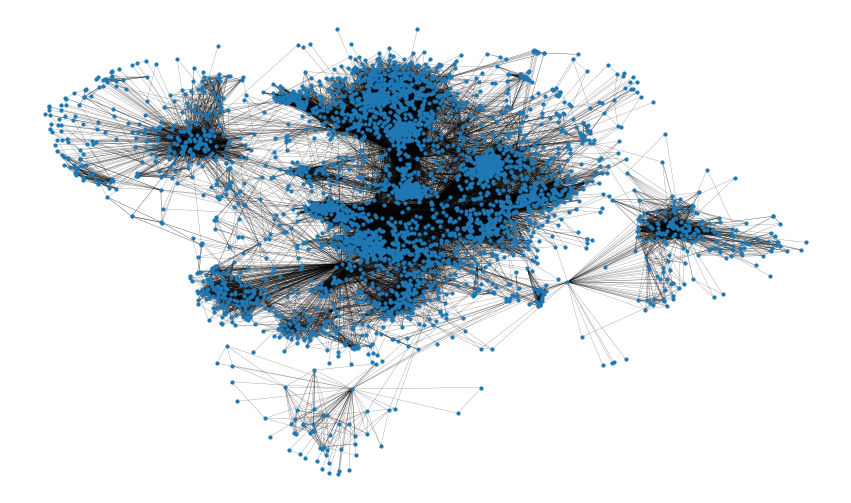

In [3]:
pos = nx.spring_layout(G, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis('off')
nx.draw_networkx(G, pos=pos, ax=ax, node_size= 10, with_labels=False, width=0.15)

Remarque : Il existe plusieurs algorithmes pour afficher un graphe. Ici, nous avons utilisé une méthode qui simule un ressort (*spring*) sur chaque arête pour minimiser l'énergie potentielle.

Sur le dessin, on remarque qu'il y a des groupes très connectés (*clusters*).

### Statistiques générales

Calculons le nombre de sommets :

In [4]:
G.number_of_nodes() # nombre de sommets

4039

Les sommets sont numérotés par des entiers (de $0$ à $4038$). On peut accéder à la liste des voisins d'un sommet `u` en écrivant `G.neighbors(u)` :

In [5]:
list(G.neighbors(1)) # voisins de 1

[0, 48, 53, 54, 73, 88, 92, 119, 126, 133, 194, 236, 280, 299, 315, 322, 346]

Par exemple, il y a une arête entre le sommet $1$ et le sommet $48$.

**Exercice** : Écrire une fonction `deg` renvoyant le degré d'un sommet, c'est-à-dire le nombre de voisins (= le nombre d'amis de la personne considérée). Par exemple, `deg(G, 1)` doit renvoyer $17$ (la taille de la liste ci-dessus).

In [9]:
def deg(G, node):
    return len(list(G.neighbors(node)))

deg(G, 1)

17

**Exercice** : En utilisant la formule $\sum_{v \in V} \deg(v) = 2 |E|$, calculer le nombre d'arêtes $|E|$ de `G`. Vérifier avec `G.number_of_edges()`.

In [15]:
p = 0
for v in range(G.number_of_nodes()):
    p += deg(G, v)

print(f"{p//2} {G.number_of_edges()}") # vérification

88234 88234


**Exercice** : Quelle est la personne avec le nombre maximum d'amis ? Quel est son nombre d'amis ?

In [17]:
v_max = 0
for v in range(G.number_of_nodes()):
    if deg(G, v) > deg(G, v_max):
        v_max = v

deg(G, v_max) # le nombre max d'amis est 1045

1045

**Exercice** : Quel est le nombre moyen d'amis (la moyenne des degrés) ?

In [19]:
s = 0
for v in range(G.number_of_nodes()):
    s += deg(G, v)
s/G.number_of_nodes()

43.69101262688784

### Chemins

Commençons par calculer le nombre de composantes connexes :

In [6]:
nx.number_connected_components(G)

1

Il y a une seule composante connexe, ce qui veut dire que chaque sommet est relié à tous les autres par un chemin (`G` est connexe).

Étant donné deux sommets, on s'intéresse au plus court chemin entre les deux, c'est-à-dire le nombre minimum de sommets à parcourir pour aller de l'un à l'autre. Calculons les plus courts chemins (on verra plus tard dans le cours un algorithme pour calculer les plus courts chemins) :

In [21]:
shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(G))

Exemple :

In [22]:
shortest_path_lengths[1][348] # distance entre les sommets 1 et 348

3

**Exercice** : Calculer la longueur moyenne d'un plus court chemin entre deux sommetes quelconques.  
Ce nombre est aussi appelé ["degré de séparation"](https://fr.wikipedia.org/wiki/Six_degr%C3%A9s_de_s%C3%A9paration) et il est souvent étonnant de constate qu'aussi peu de personnes en moyenne nous sépare d'une autre dans le monde.

In [23]:
s = 0
n = G.number_of_nodes()
for u in range(n):
    for v in range(n):
        s += shortest_path_lengths[u][v]
s/n**2

3.691592636562027

**Exercice** : Calculer la distance maximum (ce que l'on appelle aussi le **diamètre**) séparant deux utilisateurs de Facebook.

In [24]:
maxi = 0
n = G.number_of_nodes()
for u in range(n):
    for v in range(n):
        l = shortest_path_lengths[u][v]
        if l > maxi:
            maxi = l
maxi

8

## Autres graphes

Faire la même étude mais avec un [autre graphe](http://snap.stanford.edu/data/index.html), par exemple celui des [articles de recherche en relativité générale (sur ArXiV)](http://snap.stanford.edu/data/ca-GrQc.html), où les sommets sont des chercheurs et les arêtes des collaborations sur un article de recherche :

In [ ]:
df = pd.read_csv('http://snap.stanford.edu/data/roadNet-CA.txt.gz', compression='gzip', sep=' ', names=['start_node', 'end_node'])
G = nx.from_pandas_edgelist(df_fb, 'start_node', 'end_node')

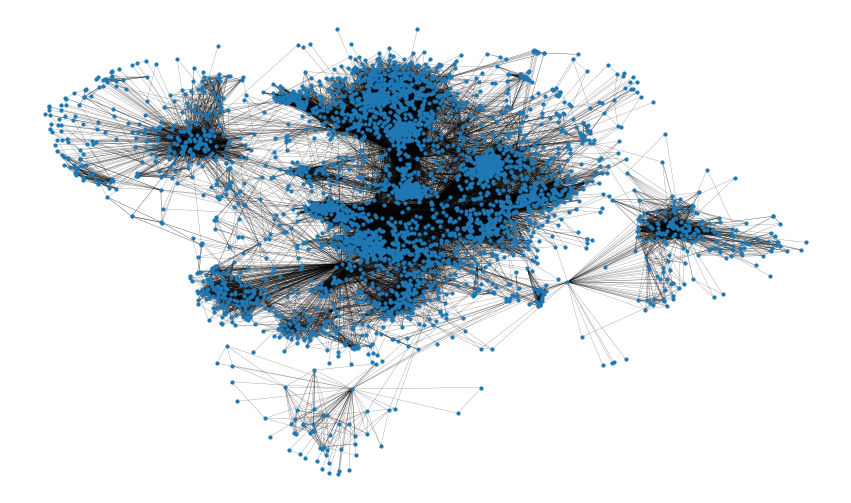

In [26]:
pos = nx.spring_layout(G, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis('off')
nx.draw_networkx(G, pos=pos, ax=ax, node_size= 10, with_labels= False, width= 0.15)